In [ ]:
# Installer la bibliothèque NumPy et Pandas
!pip install numpy
!pip install pandas

In [60]:
import numpy as np  # Importer la bibliothèque NumPy pour les opérations mathématiques
import pandas as pd  # Importer la bibliothèque pandas pour la manipulation des données
import matplotlib.pyplot as plt  # Importer matplotlib pour la visualisation des données
import seaborn as sns  # Importer seaborn pour des tracés statistiques plus avancés

In [61]:
# Lire le jeu de données sur les chaussures à partir de l'URL spécifiée et le stocker dans la variable shoes_dataset
url = "C:/Users/sasuk/OneDrive/Documents/ML/Shoe prices.csv"
shoes_dataset = pd.read_csv(url)

In [12]:
# Afficher des informations sur le jeu de données des chaussures, telles que le nombre total d'entrées, les types de données de chaque colonne, et la quantité de valeurs non nulles
shoes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
Brand          1006 non-null object
Model          1006 non-null object
Type           1006 non-null object
Gender         1006 non-null object
Size           1006 non-null object
Color          1006 non-null object
Material       1006 non-null object
Price (USD)    1006 non-null object
dtypes: object(8)
memory usage: 63.0+ KB


In [13]:
# Afficher les noms des colonnes du jeu de données des chaussures
shoes_dataset.columns

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price (USD)'],
      dtype='object')

In [14]:
# Calculer le nombre de valeurs manquantes dans chaque colonne du jeu de données des chaussures
shoes_dataset.isnull().sum()


Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64

In [15]:
# Afficher un résumé statistique des données du jeu de données des chaussures, y compris les mesures de tendance centrale, de dispersion et de forme
shoes_dataset.describe()


,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
count,1006,1006,1006,1006,1006,1006,1006,1006
unique,10,239,18,2,13,82,34,33
top,Nike,NMD_R1,Running,Men,US 8.5,Black,Mesh,$65.00
freq,118,39,332,535,132,178,308,121


In [62]:
# Afficher la forme du jeu de données des chaussures, c'est-à-dire le nombre de lignes et de colonnes
shoes_dataset.shape


(1006, 8)

In [17]:
# Afficher un échantillon aléatoire de 4 lignes du jeu de données des chaussures
shoes_dataset.sample(4)


,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
589,Vans,Sk8-Hi,Skate,Women,US 7.5,Red,Canvas/Suede,$70.00
744,Skechers,D'Lites Fresh Start,Walking,Men,US 10.5,Black,Leather,$60.00
739,Puma,Suede Classic+,Casual,Men,US 8.5,Black/White,Suede,$65.00
272,Skechers,Max Cushioning,Running,Men,US 11,Black,Mesh,$85.00


In [19]:
# Supprimer la colonne 'Model' du jeu de données des chaussures et mettre à jour le jeu de données
shoes_dataset = shoes_dataset.drop('Model', axis=1)


In [20]:
# Afficher les premières lignes du jeu de données des chaussures après avoir supprimé la colonne 'Model'
shoes_dataset.head()


,Brand,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [21]:
# Afficher le décompte du nombre de chaussures par marque dans la colonne 'Brand' du jeu de données des chaussures
shoes_dataset['Brand'].value_counts()

Nike           118
Puma           100
Vans           100
Converse       100
New Balance    100
Reebok         100
Adidas         100
Asics          100
Fila            99
Skechers        89
Name: Brand, dtype: int64

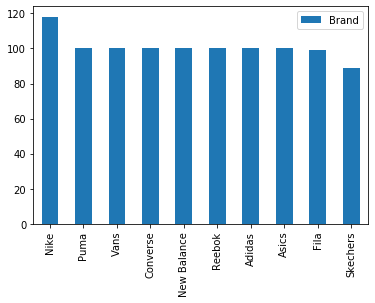

In [22]:
# Tracer un diagramme à barres montrant le décompte du nombre de chaussures par marque dans la colonne 'Brand' du jeu de données des chaussures
shoes_dataset['Brand'].value_counts().plot(kind='bar', legend='false')

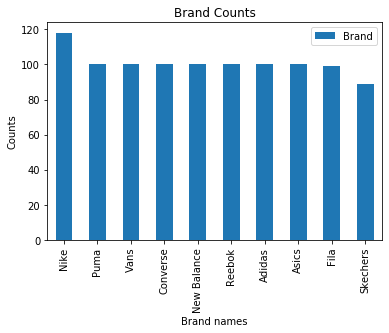

In [25]:
# Tracer un diagramme à barres montrant le décompte du nombre de chaussures par marque dans la colonne 'Brand' du jeu de données des chaussures
shoes_dataset['Brand'].value_counts().plot(kind='bar', legend=False)
plt.title('Brand Counts')  # Ajouter un titre au graphique
plt.xlabel('Brand names')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Counts')  # Ajouter une étiquette à l'axe des y
plt.show()


In [26]:
# Convertir les valeurs de la colonne 'Type' en minuscules dans le jeu de données des chaussures
shoes_dataset['Type'] = shoes_dataset['Type'].str.lower()

In [27]:
# Afficher le décompte du nombre de chaussures par type dans la colonne 'Type' du jeu de données des chaussures
shoes_dataset['Type'].value_counts()

running           332
casual            243
skate             100
fashion            86
lifestyle          76
basketball         52
walking            46
training           34
crossfit           14
trail               6
weightlifting       4
trail running       3
slides              3
retro               3
hiking              2
racing              1
cross-training      1
Name: Type, dtype: int64

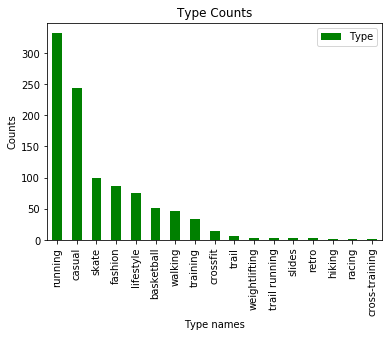

In [28]:
# Tracer un diagramme à barres montrant le décompte du nombre de chaussures par type dans la colonne 'Type' du jeu de données des chaussures
shoes_dataset['Type'].value_counts().plot(kind='bar', legend=False, color='green')
plt.title('Type Counts')  # Ajouter un titre au graphique
plt.xlabel('Type names')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Counts')  # Ajouter une étiquette à l'axe des y
plt.show()


In [29]:
# Définir une fonction pour ajouter un type à chaque chaussure en fonction de certains critères
def add_type(inpt):
    if inpt == 'casual' or inpt == 'fashion' or inpt == 'lifestyle' or inpt == 'slides' or inpt == 'retro':
        return inpt
    else:
        return 'sport'

# Appliquer la fonction add_type à la colonne 'Type' du jeu de données des chaussures
shoes_dataset['Type'] = shoes_dataset['Type'].apply(add_type)


In [30]:
# Afficher le décompte du nombre de chaussures par type dans la colonne 'Type' du jeu de données des chaussures après avoir appliqué la fonction add_type
shoes_dataset['Type'].value_counts()


sport        595
casual       243
fashion       86
lifestyle     76
retro          3
slides         3
Name: Type, dtype: int64

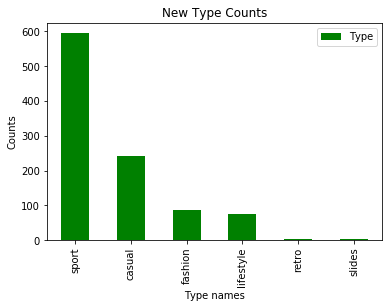

In [31]:
# Tracer un diagramme à barres montrant le décompte du nombre de chaussures par type dans la colonne 'Type' du jeu de données des chaussures après avoir appliqué la fonction add_type
shoes_dataset['Type'].value_counts().plot(kind='bar', legend=False, color='green')
plt.title('New Type Counts')  # Ajouter un titre au graphique
plt.xlabel('Type names')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Counts')  # Ajouter une étiquette à l'axe des y
plt.show()

In [32]:
# Afficher le décompte du nombre de chaussures par genre dans la colonne 'Gender' du jeu de données des chaussures
shoes_dataset['Gender'].value_counts()

Men      535
Women    471
Name: Gender, dtype: int64

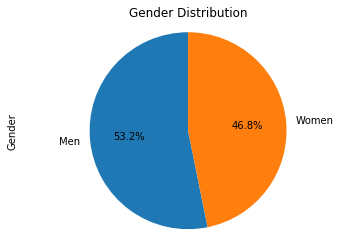

In [33]:
# Tracer un diagramme circulaire montrant la répartition du nombre de chaussures par genre dans la colonne 'Gender' du jeu de données des chaussures
shoes_dataset['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')  # Ajouter un titre au graphique
plt.axis('equal')  # Assurer que le graphique est un cercle (aspect égal)
plt.show()


In [63]:
# Remplacer les occurrences de 'US' par une chaîne vide dans la colonne 'Size' du jeu de données des chaussures
shoes_dataset['Size'] = shoes_dataset['Size'].str.replace('US', '')


In [35]:
# Afficher les premières lignes du jeu de données des chaussures après avoir remplacé 'US' dans la colonne 'Size'
shoes_dataset.head()


,Brand,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,sport,Men,10,Red/Black,Leather,$170.00
1,Adidas,sport,Men,9.5,Black,Primeknit,$180.00
2,Reebok,casual,Men,11,White,Leather,$75.00
3,Converse,casual,Women,8,Navy,Canvas,$55.00
4,Puma,lifestyle,Women,7.5,Pink,Mesh,$80.00


In [36]:
# Convertir les valeurs de la colonne 'Size' en type float dans le jeu de données des chaussures
shoes_dataset['Size'] = shoes_dataset['Size'].astype(float)


In [37]:
# Afficher des informations mises à jour sur le jeu de données des chaussures après avoir converti la colonne 'Size' en type float
shoes_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
Brand          1006 non-null object
Type           1006 non-null object
Gender         1006 non-null object
Size           1006 non-null float64
Color          1006 non-null object
Material       1006 non-null object
Price (USD)    1006 non-null object
dtypes: float64(1), object(6)
memory usage: 55.1+ KB


In [38]:
# Convertir les valeurs de la colonne 'Color' en minuscules dans le jeu de données des chaussures
shoes_dataset['Color'] = shoes_dataset['Color'].str.lower()


In [39]:
# Afficher le décompte du nombre de chaussures par couleur dans la colonne 'Color' du jeu de données des chaussures
shoes_dataset['Color'].value_counts()


black          178
white          139
grey           101
black/white    100
pink            64
              ... 
cinder           1
true white       1
white/gold       1
zebra            1
black/blue       1
Name: Color, Length: 82, dtype: int64

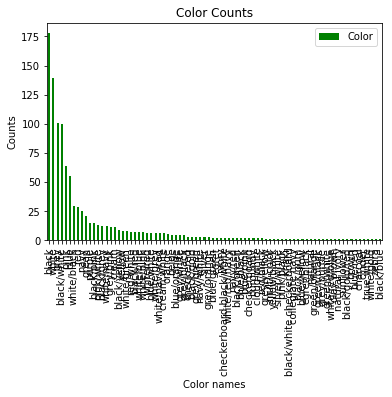

In [41]:
# Tracer un diagramme à barres montrant le décompte du nombre de chaussures par couleur dans la colonne 'Color' du jeu de données des chaussures
shoes_dataset['Color'].value_counts().plot(kind='bar', legend=False, color='green')
plt.title('Color Counts')  # Ajouter un titre au graphique
plt.xlabel('Color names')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Counts')  # Ajouter une étiquette à l'axe des y
plt.show()


In [42]:
# Définir une fonction pour ajouter une couleur à chaque chaussure en fonction de certains critères
def add_Color(inpt):
    if inpt == 'black' or inpt == 'white' or inpt == 'grey' or inpt == 'black/white' or inpt == 'pink':
        return inpt
    else:
        return 'other'

# Appliquer la fonction add_Color à la colonne 'Color' du jeu de données des chaussures
shoes_dataset['Color'] = shoes_dataset['Color'].apply(add_Color)


In [43]:
# Afficher le décompte du nombre de chaussures par couleur dans la colonne 'Color' du jeu de données des chaussures après avoir appliqué la fonction add_Color
shoes_dataset['Color'].value_counts()


other          424
black          178
white          139
grey           101
black/white    100
pink            64
Name: Color, dtype: int64

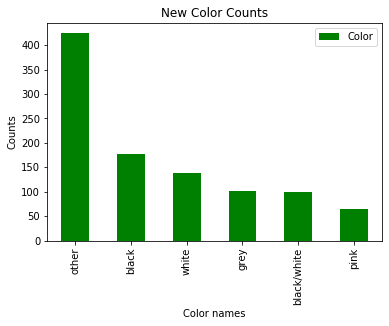

In [45]:
# Tracer un diagramme à barres montrant le décompte du nombre de chaussures par couleur dans la colonne 'Color' du jeu de données des chaussures après avoir appliqué la fonction add_Color
shoes_dataset['Color'].value_counts().plot(kind='bar', legend=False, color='green')
plt.title('New Color Counts')  # Ajouter un titre au graphique
plt.xlabel('Color names')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Counts')  # Ajouter une étiquette à l'axe des y
plt.show()


In [46]:
# Convertir les valeurs de la colonne 'Material' en minuscules dans le jeu de données des chaussures
shoes_dataset['Material'] = shoes_dataset['Material'].str.lower()

In [47]:
# Afficher le décompte du nombre de chaussures par matériau dans la colonne 'Material' du jeu de données des chaussures
shoes_dataset['Material'].value_counts()


mesh                    308
leather                 168
canvas                  147
primeknit                68
leather/synthetic        47
synthetic                46
mesh/synthetic           36
suede/mesh               32
suede/canvas             29
suede                    19
flyknit                  17
knit                     15
nylon                    13
canvas/suede              9
synthetic/mesh            7
suede/leather             6
synthetic/leather         6
suede/nylon               5
flexweave                 4
nylon/suede               3
knit/synthetic            3
leather/suede             3
suede/textile             3
synthetic/textile         2
flexweave/synthetic       1
mesh/leather              1
textile/leather           1
mesh/suede                1
canvas/leather            1
textile                   1
primeknit/synthetic       1
leather/mesh              1
flexweave/knit            1
flexweave/cushioning      1
Name: Material, dtype: int64

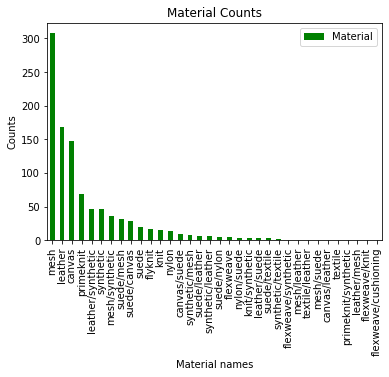

In [49]:
# Tracer un diagramme à barres montrant le décompte du nombre de chaussures par matériau dans la colonne 'Material' du jeu de données des chaussures
shoes_dataset['Material'].value_counts().plot(kind='bar', legend=False, color='green')
plt.title('Material Counts')  # Ajouter un titre au graphique
plt.xlabel('Material names')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Counts')  # Ajouter une étiquette à l'axe des y
plt.show()


In [50]:
# Définir une fonction pour ajouter un matériau à chaque chaussure en fonction de certains critères
def add_Material(inpt):
    if inpt == 'mech' or inpt == 'leather' or inpt == 'canvas' or inpt == 'primeknit' or inpt == 'synthetic' or inpt == 'suede' or inpt == 'knit' or inpt == 'nylon':
        return inpt
    else:
        return 'other'

# Appliquer la fonction add_Material à la colonne 'Material' du jeu de données des chaussures
shoes_dataset['Material'] = shoes_dataset['Material'].apply(add_Material)


In [51]:
# Afficher le décompte du nombre de chaussures par matériau dans la colonne 'Material' du jeu de données des chaussures après avoir appliqué la fonction add_Material
shoes_dataset['Material'].value_counts()


other        530
leather      168
canvas       147
primeknit     68
synthetic     46
suede         19
knit          15
nylon         13
Name: Material, dtype: int64

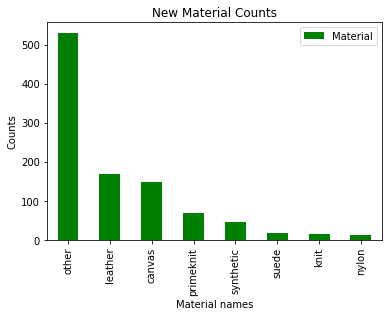

In [53]:
# Tracer un diagramme à barres montrant le décompte du nombre de chaussures par matériau dans la colonne 'Material' du jeu de données des chaussures après avoir appliqué la fonction add_Material
shoes_dataset['Material'].value_counts().plot(kind='bar', legend=False, color='green')
plt.title('New Material Counts')  # Ajouter un titre au graphique
plt.xlabel('Material names')  # Ajouter une étiquette à l'axe des x
plt.ylabel('Counts')  # Ajouter une étiquette à l'axe des y
plt.show()


In [54]:
# Supprimer le symbole '$' des valeurs de la colonne 'Price (USD)' et convertir les valeurs en type float dans le jeu de données des chaussures
shoes_dataset['Price (USD)'] = shoes_dataset['Price (USD)'].str.replace('$', '').astype(float)

# Afficher les cinq premières lignes du jeu de données des chaussures après avoir modifié la colonne 'Price (USD)'
shoes_dataset.head(5)


,Brand,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,sport,Men,10.0,other,leather,170.0
1,Adidas,sport,Men,9.5,black,primeknit,180.0
2,Reebok,casual,Men,11.0,white,leather,75.0
3,Converse,casual,Women,8.0,other,canvas,55.0
4,Puma,lifestyle,Women,7.5,pink,other,80.0


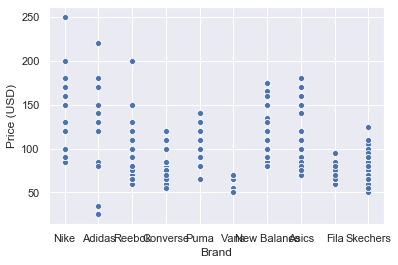

In [55]:
# Définir le style seaborn par défaut
sns.set()

# Tracer un nuage de points montrant la relation entre la marque et le prix des chaussures dans le jeu de données des chaussures
sns.scatterplot(data=shoes_dataset, x="Brand", y="Price (USD)")


In [56]:
# Afficher des informations sur le jeu de données des chaussures
shoes_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
Brand          1006 non-null object
Type           1006 non-null object
Gender         1006 non-null object
Size           1006 non-null float64
Color          1006 non-null object
Material       1006 non-null object
Price (USD)    1006 non-null float64
dtypes: float64(2), object(5)
memory usage: 55.1+ KB


In [57]:
# Convertir les variables catégorielles en variables indicatrices (dummy variables) dans le jeu de données des chaussures
shoes_dataset = pd.get_dummies(shoes_dataset, dtype=int)

# Afficher les cinq premières lignes du jeu de données des chaussures après avoir converti les variables catégorielles en variables indicatrices
shoes_dataset.head(5)

# Afficher des informations mises à jour sur le jeu de données des chaussures après avoir converti les variables catégorielles en variables indicatrices
shoes_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 34 columns):
Size                  1006 non-null float64
Price (USD)           1006 non-null float64
Brand_Adidas          1006 non-null int32
Brand_Asics           1006 non-null int32
Brand_Converse        1006 non-null int32
Brand_Fila            1006 non-null int32
Brand_New Balance     1006 non-null int32
Brand_Nike            1006 non-null int32
Brand_Puma            1006 non-null int32
Brand_Reebok          1006 non-null int32
Brand_Skechers        1006 non-null int32
Brand_Vans            1006 non-null int32
Type_casual           1006 non-null int32
Type_fashion          1006 non-null int32
Type_lifestyle        1006 non-null int32
Type_retro            1006 non-null int32
Type_slides           1006 non-null int32
Type_sport            1006 non-null int32
Gender_Men            1006 non-null int32
Gender_Women          1006 non-null int32
Color_black           1006 non-null int32
Color_b

In [58]:
# Définir la variable X en supprimant la colonne 'Price (USD)' du jeu de données des chaussures
x = shoes_dataset.drop('Price (USD)', axis=1)
x


,Size,Brand_Adidas,Brand_Asics,Brand_Converse,Brand_Fila,Brand_New Balance,Brand_Nike,Brand_Puma,Brand_Reebok,Brand_Skechers,...,Color_pink,Color_white,Material_canvas,Material_knit,Material_leather,Material_nylon,Material_other,Material_primeknit,Material_suede,Material_synthetic
0,10.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,11.0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,8.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7.5,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,10.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1002,9.5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1003,7.5,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1004,8.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [59]:
# Définir la variable y comme la colonne 'Price (USD)' du jeu de données des chaussures
y = shoes_dataset['Price (USD)']
y


0       170.0
1       180.0
2        75.0
3        55.0
4        80.0
        ...  
1001    130.0
1002    160.0
1003     70.0
1004     55.0
1005    170.0
Name: Price (USD), Length: 1006, dtype: float64